# Importing Packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pathlib import Path
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# Reading the file and removing the not required columns (ID, ZIP code)

In [2]:
univ_df = pd.read_csv('UniversalBank.csv')
univ_df = univ_df.drop(columns=['ID','ZIP Code'])
univ_df.head(6)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0


# Renaming the columns

In [3]:
univ_df.columns = [c.replace(' ','_').replace('=','_') for c in univ_df.columns]
list(univ_df.columns)

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal_Loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

# Creating dummy variables for categorical columns

In [4]:
x= univ_df['Education']
x.head(9)

0    1
1    1
2    1
3    2
4    2
5    2
6    2
7    3
8    2
Name: Education, dtype: int64

In [5]:
univ_df['Education'] = univ_df['Education'].astype('category')
univ_df = pd.get_dummies(univ_df, prefix_sep='_', drop_first=False)
univ_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


# Splitting dataset among training(60%) and validation (40%) data

In [6]:
train_df, valid_df = train_test_split(univ_df, test_size = 0.4, random_state=1)
print('Training Data -', train_df.shape)
print('Validation Data -', valid_df.shape)

Training Data - (3000, 14)
Validation Data - (2000, 14)


# Defining new data frame for which k-NN prediction need to be done

In [7]:
new_univ = pd.DataFrame([{'Age': 40,'Experience': 10,'Income': 84,'Family': 2,'CCAvg': 2,'Education_1': 0,'Education_2': 1,'Education_3': 0,'Mortgage': 0,'Securities Account': 0,'CD Account': 0,'Online': 1,'CreditCard': 1}])
new_univ

,Age,Experience,Income,Family,CCAvg,Education_1,Education_2,Education_3,Mortgage,Securities Account,CD Account,Online,CreditCard
0,40,10,84,2,2,0,1,0,0,0,0,1,1


# Normalization and Removing target column

In [8]:
predictors = list(univ_df.columns)
outcome = 'Personal_Loan'
predictors.remove(outcome)
print(predictors)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3']


# Preprocessing

In [9]:
Scaler = preprocessing.StandardScaler()
Scaler.fit(train_df[predictors])

StandardScaler()

In [10]:
train_x = Scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_x = Scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]
new_univ_Norm = pd.DataFrame(Scaler.transform(new_univ),columns=['Age','Experience','Income','Family','CCAvg','Mortgage','Securities_Account','CD_Account','Online','CreditCard','Education_1','Education_2','Education_3'])
print(new_univ_Norm)

        Age  Experience    Income    Family     CCAvg  Mortgage  \
0 -0.486446   -0.901063  0.220892 -0.352127  0.035689 -0.559242   

   Securities_Account  CD_Account    Online  CreditCard  Education_1  \
0             2.96714   -0.252646 -1.198767     -0.6505    -0.838795   

   Education_2  Education_3  
0     1.591719     1.513101  


# lets train the k-NN algorithm with K value = 1

In [11]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=1)

# lets predict the performance and outcome of k-NN algorithm

In [12]:
print(classifier.predict(new_univ_Norm))

[0]


In [13]:
print(classifier.predict_proba(new_univ_Norm))

[[1. 0.]]


# Using the K-NN algorithm for this dataset, the model predicted that the chance or the probability of personal acceptance is zero. This customer would be classifed as an inegilible for a loan.

# Training the classifier for different values of k

In [14]:
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_x, train_y)
    results.append({'k': k, 'accuracy': accuracy_score(train_y, knn.predict(train_x))})
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  1.000000
1    2  0.969667
2    3  0.976667
3    4  0.970667
4    5  0.972000
5    6  0.965333
6    7  0.968667
7    8  0.960000
8    9  0.964667
9   10  0.958333
10  11  0.960333
11  12  0.956333
12  13  0.957667
13  14  0.952333


# plotting accuracy and K

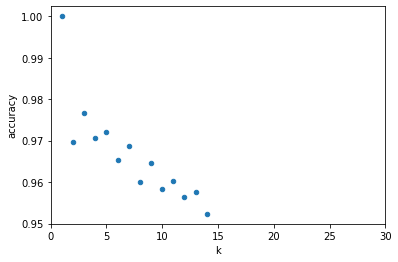

In [15]:
p = results.plot.scatter(x='k', y='accuracy', xlim=[0,30])

# the choice of k that balances between overfitting and ignoring the predictor information is k=5

# Confusion matrix for the validation data that results from using the best k

In [16]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_x, train_y)
predict_y = classifier.predict(valid_x)
print(confusion_matrix(valid_y, predict_y))
print('Accuracy:', accuracy_score(valid_y, predict_y))

[[1803    4]
 [  83  110]]
Accuracy: 0.9565


# The best k value performs an accuracy value of 0.9565 for the validation data

# Classifying the customer using the best k

In [17]:
classifier.predict_proba(new_univ_Norm)

array([[1., 0.]])

In [18]:
print(classifier.predict(new_univ_Norm))

[0]


# this shows that new customer is not allowed to be offered a  loan

# Comparison of the confusion matrix of the test set with that of the training and validation sets

In [19]:
# Splitting the data in training(50%), validation(30%),and test(20%) sets
train_df, temp_df = train_test_split(univ_df, test_size=0.5, random_state=1)
valid_df, test_df = train_test_split(temp_df, test_size=0.4, random_state=1)
print('Training dataset', train_df.shape)
print('Validation dataset', valid_df.shape)
print('Test dataset', test_df.shape)

Training dataset (2500, 14)
Validation dataset (1500, 14)
Test dataset (1000, 14)


In [20]:
# Outcomes feature scaling and preprocessing
outcome = 'Personal_Loan'
predictors = list(univ_df.columns)
predictors.remove(outcome)
Scaler = preprocessing.StandardScaler()
Scaler.fit(train_df[predictors])
train_x = Scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_x = Scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]
test_x = Scaler.transform(test_df[predictors])
test_y = test_df[outcome]

In [21]:
# fitting the data for the best K value (5)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_x, train_y)

KNeighborsClassifier()

In [22]:
#Confusion Matrix for training data
knnPredOpt = classifier.predict(train_x)
print(confusion_matrix(train_y, knnPredOpt))
print('Accuracy:', accuracy_score(train_y, knnPredOpt))

[[2255    4]
 [  75  166]]
Accuracy: 0.9684


In [23]:
#Confusion Matrix for Validation Data
knnPredict = classifier.predict(valid_x)
print(confusion_matrix(valid_y, knnPredict))
print('Accuracy:', accuracy_score(valid_y, knnPredict))

[[1346    3]
 [  67   84]]
Accuracy: 0.9533333333333334


In [24]:
#Confusion Matrix for test Dataset
knnPredict = classifier.predict(test_x)
print(confusion_matrix(test_y, knnPredict))
print('Accuracy:', accuracy_score(test_y, knnPredict))

[[907   5]
 [ 35  53]]
Accuracy: 0.96


# the change of the accuracy is caused by the performance of the prediction on train , test, and validation dataset. Accuracy decreased from performing the validation then increased while performing the test of the dataset